## Bayes B MHC 

In [18]:
MHC_BV_Var<- read.table(file="~/mark/JWAS_CDPQ/CDPQ_all_data/FinADG_Score4/BayesB_MHC_BV_Var.txt", head=T, sep=",")
library(tidyverse)
MHC_BV_Var<- filter(MHC_BV_Var, !is.na(corr))
head(MHC_BV_Var)

iteration,corr,var_AllTRT,var_ADG,covar
1,-0.65620808,0.0004117433,3.321874e-05,-7.674435e-05
2,-0.39987180,0.0005363009,6.015764e-05,-7.182414e-05
3,-0.07993176,0.0004149892,2.779556e-05,-8.584707e-06
4,0.11513620,0.0003867206,1.652780e-05,9.204877e-06
5,-0.25340477,0.0006583063,5.317354e-05,-4.741072e-05
6,-0.07867101,0.0010297893,2.080410e-04,-3.641358e-05


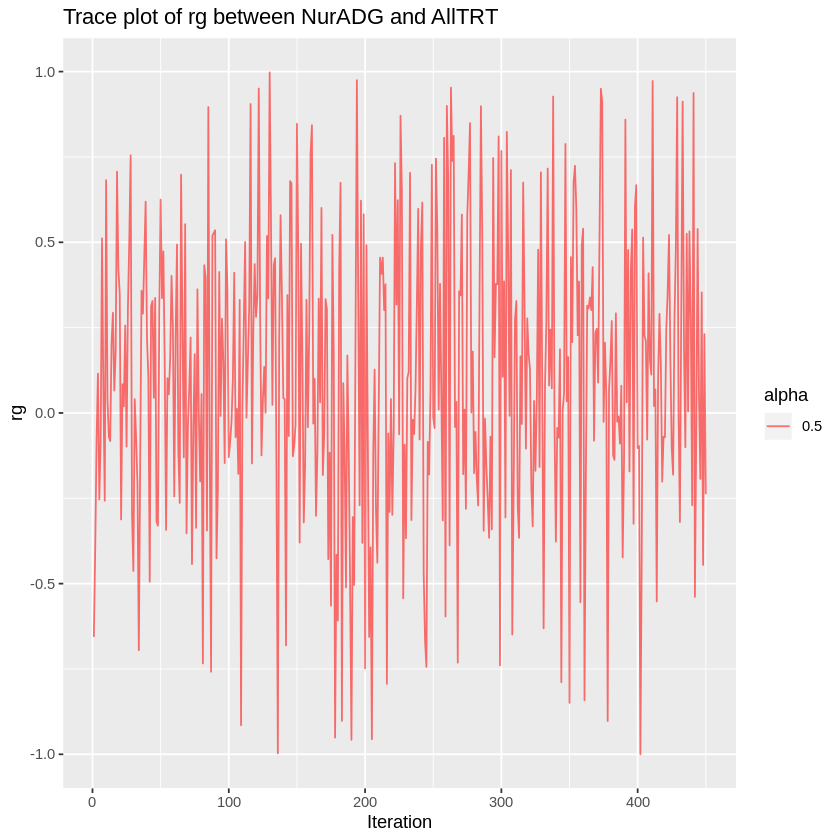

In [19]:
library(ggplot2)
ggplot(MHC_BV_Var, 
             aes(x=iteration, y=corr)) +
        geom_line(color="red", aes(alpha=0.5)) +
        ggtitle("Trace plot of rg between NurADG and AllTRT") +
        xlab("Iteration") +
        ylab("rg")

In [20]:
mean(MHC_BV_Var$corr)

[1] 0.106976

In [21]:
var1= mean(MHC_BV_Var$var_AllTRT)
var2= mean(MHC_BV_Var$var_ADG)
covar= mean(MHC_BV_Var$covar)

In [22]:
covar/sqrt(var1 * var2)

[1] 0.1698449

In [23]:
#install.packages("bayestestR")
library(bayestestR)

# Compute HDI and Quantile CI
ci_hdi <- ci(MHC_BV_Var, method = "HDI")
ci_eti <- ci(MHC_BV_Var, method = "ETI")

In [24]:
ci_eti

Parameter,CI,CI_low,CI_high
iteration,89,2.542000e+01,4.255800e+02
corr,89,-6.212842e-01,7.794111e-01
var_AllTRT,89,7.458958e-05,2.459720e-03
var_ADG,89,3.662502e-06,1.428594e-04
covar,89,-8.807263e-05,2.393703e-04


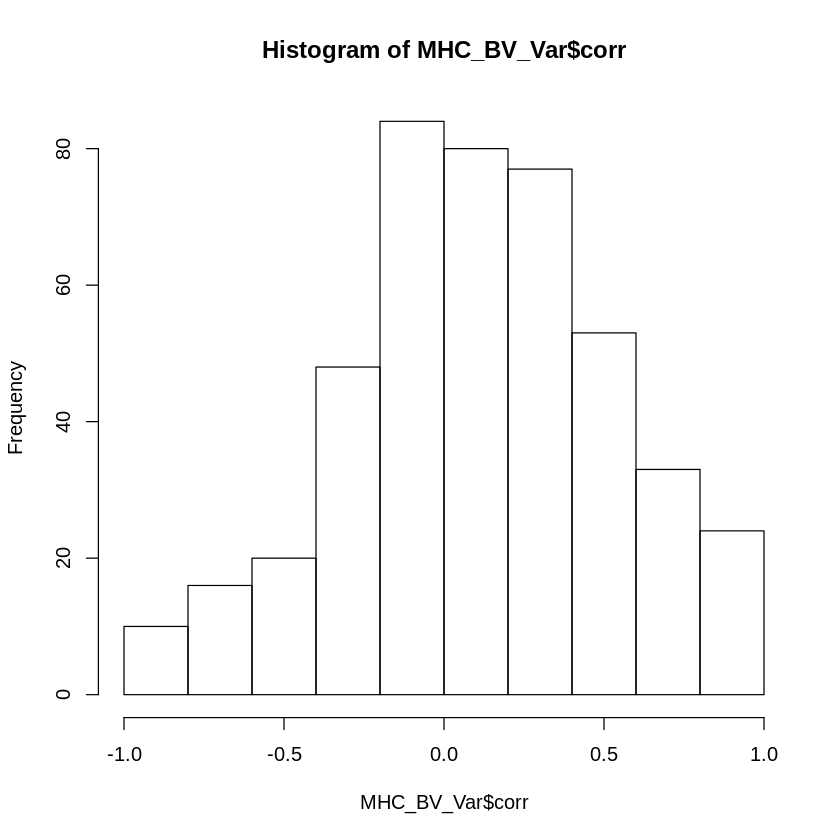

In [25]:
hist(MHC_BV_Var$corr)